# HW3.1: Fashion MNIST image classification with MLPs

Builds neural networks with Multi-Layer Perceptrons classify images from the
Fashion MNIST data set within tensorflow Keras framework.

Model accuracy achieved: (goal = more than 90% accuracy on X_test)

Instructor: Shuo Zhang

Student: Madelyn Silveira

Date: 02/05/2025


## About the data

Fashion MNIST is a dataset from online fashion retailer Zalando consisting of a training set of 60,000 examples and a test set of 10,000 examples, where each example is a 28x28 grayscale image belonging to one of 10 possible classes (such as a t-shirt, dress, etc).

The 10 class labels:

| Label | Description   |
| ----- |:-------------:|
| 0     | T-shirt/top   |
| 1     | Trouser       |   
| 2     | Pullover      |  
| 3     | Dress         |
| 4     | Coat          |   
| 5     | Sandal        |
| 6     | Shirt         |
| 7     | Sneaker       |   
| 8     | Bag           |  
| 9     | Ankle boot    |  

In [1]:
# clear all variables in this workspace
%reset -f

In [2]:
# load the dataset
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Look at the dataset

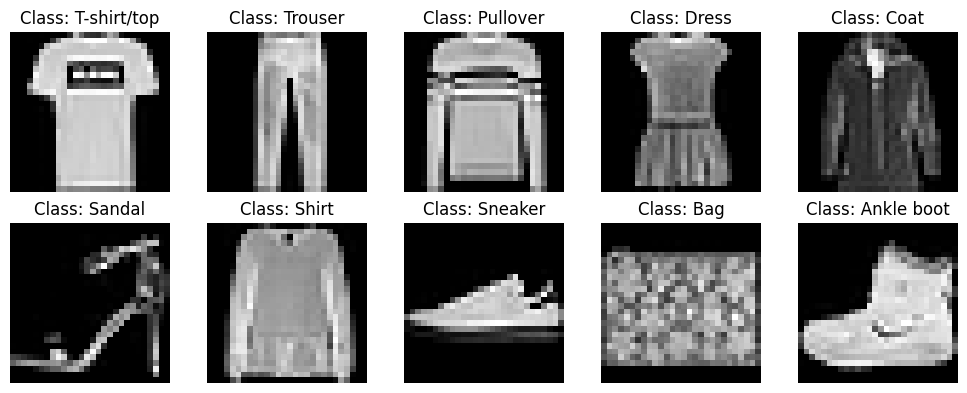

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# assign class names to numerical labels
class_labels_dict = {0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",
                     5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}

# view class images in inline plot
fig = plt.figure(figsize=(10,4))

for i in range(10):
    plt.subplot(2,5,i+1)
    img = X_train[y_train == i][0]
    plt.imshow(img, cmap='gray', interpolation='none')
    plt.title("Class: {}".format(class_labels_dict[i]))
    plt.axis('off')

plt.tight_layout()

## 1. Build and train the model

### Dataset inspection

In [4]:
us = "\033[4m"
ue = "\033[0m"

# 1. inspect datatypes of datasets
print(f"1) {us}Inspect the datatypes of the datasets.{ue}")
print(f"X_train datatype: {type(X_train)}\nX_train feature type: {type(X_train[0][0][0])}")
print(f"y_train datatype: {type(y_train)}\ny_train element type: {type(y_train[0])}\n")


# # 2. inspect dimensions of datasets
print(f"2) {us}Inspect the dimensions of the datasets.{ue}")
print(f"X_train dim: {X_train.ndim} \t shape: {X_train.shape}")
print(f"X_test dim: {X_test.ndim} \t shape: {X_test.shape}")
print(f"y_train dim: {y_train.ndim} \t shape: {y_train.shape}")
print(f"y_test dim: {y_test.ndim} \t shape: {y_test.shape}\n")

1) Inspect the datatypes of the datasets.
X_train datatype: <class 'numpy.ndarray'>
X_train feature type: <class 'numpy.uint8'>
y_train datatype: <class 'numpy.ndarray'>
y_train element type: <class 'numpy.uint8'>

2) Inspect the dimensions of the datasets.
X_train dim: 3 	 shape: (60000, 28, 28)
X_test dim: 3 	 shape: (10000, 28, 28)
y_train dim: 1 	 shape: (60000,)
y_test dim: 1 	 shape: (10000,)



### Data preprocessing

In [5]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# 1. flatten each image into 1d array where z = x*y = 784
print(f"1) {us}Flatten each image into a 1D array.{ue}")
X_train_reshaped = X_train.reshape(X_train.shape[0], 28*28)
X_test_reshaped = X_test.reshape(X_test.shape[0], 28*28)
print(f"The old shape of X_train is {X_train.shape}.")
print(f"The new shape of X_train is {X_train_reshaped.shape}.\n")

# 2. normalize the pixel values to be between 0 and 1
print(f"2) {us}Normalize the pixel values to be between 0 and 1.{ue}")
min_val, max_val = np.min(X_train[:20]), np.max(X_train[:20])
print(f"Original pixel val range: [{min_val}, {max_val}]")

X_train_norm = X_train_reshaped / float(max_val)
X_test_norm = X_test_reshaped / float(max_val)

min_val, max_val = np.min(X_train_norm[:20]), np.max(X_train_norm[:20])
print(f"Normalized pixel val range: [{min_val}, {max_val}]\n")

# 3. convert labels to categorical data
print(f"3) {us}Convert labels to categorical data.{ue}")
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print(f"Original label: {y_train[0]}")
print(f"One-hot encoded label: {y_train_cat[0]}")

1) Flatten each image into a 1D array.
The old shape of X_train is (60000, 28, 28).
The new shape of X_train is (60000, 784).

2) Normalize the pixel values to be between 0 and 1.
Original pixel val range: [0, 255]
Normalized pixel val range: [0.0, 1.0]

3) Convert labels to categorical data.
Original label: 9
One-hot encoded label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [6]:
# reset the names now that you've finished preprocessing
X_train = X_train_norm
X_test = X_test_norm
y_train = y_train_cat
y_test = y_test_cat

### Model building

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras

nn = Sequential()
nn.add(Dense(units=512, input_shape=(784,), activation='relu'))
nn.add(Dense(units=256, activation='relu'))
nn.add(Dense(units=10, activation='softmax'))

# compile and summarize
nn.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

nn.summary() # goal: <= 1 million parameters

# train the model
hist = nn.fit(X_train, y_train,
                 epochs=10, batch_size=64, validation_split=0.2)

print(hist.history.keys())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - categorical_accuracy: 0.7809 - loss: 0.6117 - val_categorical_accuracy: 0.8598 - val_loss: 0.3892
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - categorical_accuracy: 0.8671 - loss: 0.3597 - val_categorical_accuracy: 0.8657 - val_loss: 0.3759
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - categorical_accuracy: 0.8786 - loss: 0.3293 - val_categorical_accuracy: 0.8737 - val_loss: 0.3481
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - categorical_accuracy: 0.8850 - loss: 0.3068 - val_categorical_accuracy: 0.8753 - val_loss: 0.3386
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - categorical_accuracy: 0.8958 - loss: 0.2787 - val_categorical_accuracy: 0.8773 - val_loss: 0.3382
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - categorical_accuracy: 0.8968 - loss: 0.2670 - val_categorical_accuracy: 0.8822 - val_loss: 0.3195
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - categorical_accuracy: 

More than 90% categorical accuracy with only 535,818 params!

5.  To improve the model performance, try these things:
  - add a `Dropout()` layer to prevent overfitting. One dropout layer can be added after each Dense layer with a relu activation, except for the final layer.
  - increase the number of neurons per layer;
  - adding more layers;
  - train your model for more epochs;
  - adjust your batch size;
  - please do not conduct a grid search for your hyperparameters(i.e.don't test all combinations of the hyperparameters). You should randomly sample a single hyperparameter in conjunction with a randomly sampled or fixed second hyperparameter.

In [9]:
nn = Sequential()

# add dropout layers to improve overfitting
nn.add(Dense(units=512, input_shape=(784,), activation='relu'))
nn.add(keras.layers.Dropout(0.2))
nn.add(Dense(units=256, activation='relu'))
nn.add(keras.layers.Dropout(0.1))
nn.add(Dense(units=128, activation='relu'))
nn.add(keras.layers.Dropout(0.01))
nn.add(Dense(units=10, activation='softmax'))

# compile and summarize
nn.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

nn.summary() # goal: <= 1 million parameters

# train the model
hist = nn.fit(X_train, y_train,
                 epochs=30, batch_size=64, validation_split=0.2)

print(hist.history.keys())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - categorical_accuracy: 0.7413 - loss: 0.7086 - val_categorical_accuracy: 0.8362 - val_loss: 0.4536
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - categorical_accuracy: 0.8510 - loss: 0.4047 - val_categorical_accuracy: 0.8634 - val_loss: 0.3764
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - categorical_accuracy: 0.8656 - loss: 0.3691 - val_categorical_accuracy: 0.8724 - val_loss: 0.3585
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - categorical_accuracy: 0.8718 - loss: 0.3357 - val_categorical_accuracy: 0.8751 - val_loss: 0.3434
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - categorical_accuracy: 0.8811 - loss: 0.3190 - val_categorical_accuracy: 0.8813 - val_loss: 0.3256
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - categorical_accuracy: 0.8837 - loss: 0.3125 - val_categorical_accuracy: 0.8813 - val_loss: 0.3337
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - categorical_accuracy

With 4 dense layers, 3 dropout layers, and 20 epochs, this model did not perform any better than the previous (0.9161 new vs. 0.9189 old). So I increased the epochs by 10 -- at the expense of my patience -- and the model did improve beyond the initial model to the point of 92.95% categorical accuracy. I am slightly surprised by how marginal these gains are.

### Use Tensorboard to monitor your training

In [ ]:
# callback so Tensorflow writes record of training to `./logs` dir per epoch
tb_callback = keras.callbacks.TensorBoard('./logs', update_freq=1)
hist = nn.fit(X_train, y_train, epochs=10, batch_size=64,
validation_split=0.2,callbacks=[tb_callback])

# view tensorboard localhost
!tensorboard --logdir=logs

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - categorical_accuracy: 0.8938 - loss: 0.2826 - val_categorical_accuracy: 0.8859 - val_loss: 0.3067
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - categorical_accuracy: 0.8937 - loss: 0.2827 - val_categorical_accuracy: 0.8865 - val_loss: 0.3097
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - categorical_accuracy: 0.8966 - loss: 0.2715 - val_categorical_accuracy: 0.8905 - val_loss: 0.3118
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - categorical_accuracy: 0.8979 - loss: 0.2740 - val_categorical_accuracy: 0.8928 - val_loss: 0.3047
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - categorical_accuracy: 0.8996 - loss: 0.2689 - val_categorical_accuracy: 0.8889 - val_loss: 0.3058
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - categorical_accuracy: 0.9030 - loss: 0.2610 - val_categorical_accuracy: 0.8933 - val_loss: 0.3071
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - categorical_accuracy: 0.9037 - l

# 2. Understand model performance

1. Use these tools to print out the per class performance of your model, and the confusion matrix:

`from sklearn.metrics import classification_report, confusion_matrix`

2. It's often useful to inspect the examples in test data where the model predicted incorrectly. Use the visualization code from above, inspect several (less than 10) example images where the model got wrong. Do they make sense?

In [10]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# determine class predictions
y_pred_prob = nn.predict(X_test)
print(f"Predicted probabilities: {y_pred_prob[0]}")

# convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# convert one-hot encoded labels to clothing labels
y_true = np.argmax(y_test, axis=1)

# print results
print("Classification Report:", classification_report(y_true, y_pred))
print("Confusion Matrix:", confusion_matrix(y_true, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted probabilities: [4.12056744e-09 2.80075028e-07 4.12631214e-11 3.34473139e-12
 7.62069359e-15 1.01846825e-04 2.07027534e-10 1.94538210e-03
 8.72534933e-10 9.97952461e-01]
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.86      0.85      1000
           1       0.98      0.97      0.97      1000
           2       0.83      0.77      0.80      1000
           3       0.87      0.92      0.89      1000
           4       0.80      0.82      0.81      1000
           5       0.99      0.97      0.98      1000
           6       0.73      0.72      0.73      1000
           7       0.93      0.98      0.95      1000
           8       0.98      0.96      0.97      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Let's investigate some of the incorrect classifications.

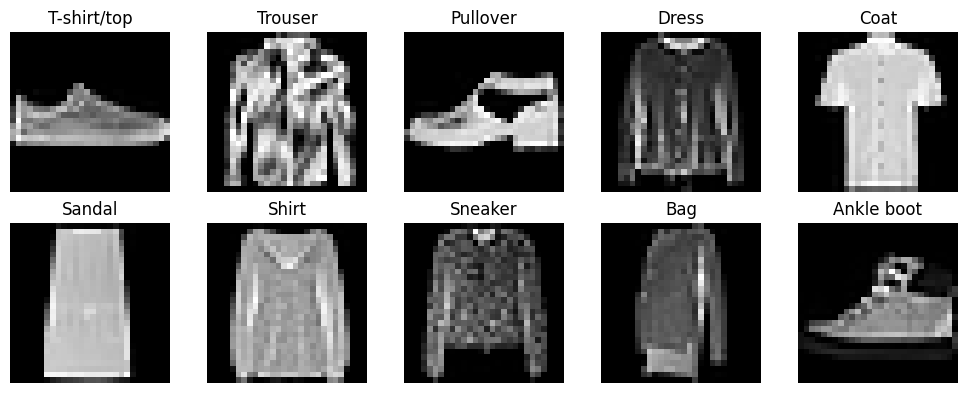

In [20]:
# grab some incorrect examples
incorrect = np.where(y_pred != y_true)[0]

fig = plt.figure(figsize=(10,4))

for i, idx in enumerate(incorrect[:10]):
    plt.subplot(2,5,i+1)
    img = X_test[idx].reshape(28, 28)
    plt.imshow(img, cmap='gray', interpolation='none')
    plt.title(class_labels_dict[i])
    plt.axis('off')

plt.tight_layout()

Some of these images, such as the incorrect sandal, bag, and trouser, would have been difficult for even my to correctly classify. I am unsurprised they are incorrect. I am slightly surprised by the incorrect coat. To me, it is obvious that a coat would have arms, but to the computer, maybe coats usually have buttons and well defined edges.